In [1]:
############PLEASE RUN THIS FILE ONLY ON JUPYTER NOTEBOOK###########
import csv
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import os
from scipy.spatial import distance

######################################################################
########### Problem 3, Part 1   #############
# Initialize an empty list to store the data
data1 = []

# Read data from the CSV file
with open('fullFreqData/fpga1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        # Convert each row to a list of floats and append it to the data list
        data1.append([float(x) for x in row])
        

In [2]:
############ Problem 3, Part 2  ############

# Convert the data list to a NumPy array for easier manipulation

data_array = np.array(data1)

# Calculate the average frequency for each RO (along axis 1)
average_frequencies = np.mean(data_array, axis=1)


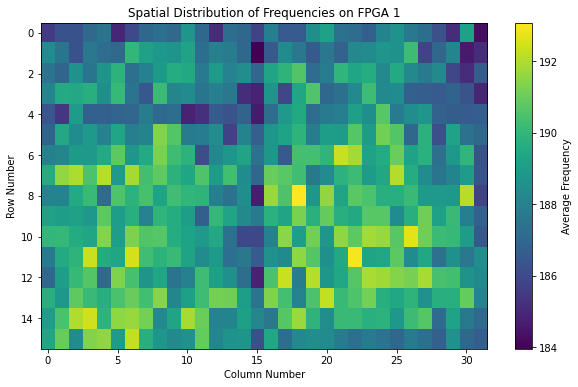

In [3]:
########## Problem 3, Part 3 #############

# Reshape the average frequencies into a 16x32 grid (assuming 16 rows and 32 columns of ROs)
average_frequencies_grid = average_frequencies.reshape(16, 32)

# Create a heatmap plot
plt.figure(figsize=(10, 6))
plt.imshow(average_frequencies_grid, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar(label='Average Frequency')
plt.title('Spatial Distribution of Frequencies on FPGA 1')
plt.xlabel('Column Number')
plt.ylabel('Row Number')
plt.show()



In [4]:
####################################################################
# Problem 4
# Read in the data
data_folder = 'fullFreqData'
fpga_responses = []  

for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename)
        with open(file_path, 'r') as csvfile:
            csvreader = csv.reader(csvfile)
            data = np.array([list(map(float, row)) for row in csvreader])
            ######### Problem 4, Part 1 #########
         
            average_freqs = np.mean(data, axis=1)

            
            ######## Problem 4, Part 2 ########
            
    
            puf_response = []
            for i in range(0, len(average_freqs) - 1, 2):
                bit = int(average_freqs[i] >= average_freqs[i + 1])
                puf_response.append(bit)

            fpga_responses.append(puf_response)
# print(np.shape(puf_response)) # 256 x 1
# print(np.shape(fpga_responses))  # 193 x 256

# Combine the individual bits into a single 256-bit PUF response for each FPGA
fpga_combined_responses = []

for puf_response in fpga_responses:
    combined_response = ''.join(map(str, puf_response)) 
    fpga_combined_responses.append(combined_response)

# Convert the combined PUF response of FPGA 1 to hexadecimal
hex_representation_fpga1 = hex(int(fpga_combined_responses[0], 2))


print(f"Hexadecimal Representation of PUF Response for FPGA 1: {hex_representation_fpga1}")


Hexadecimal Representation of PUF Response for FPGA 1: 0x2db7bf6cc7461f85c35a0b794dd179d587ffffe97e0f37d01b0bdbaf155939ad


In [5]:
######## Problem 4, Part 3 ########

# Compute Hamming distances between all pairs of PUF responses
hamming_distances = []

for pair in combinations(fpga_responses, 2): 
    hamming_distance = distance.hamming(pair[0], pair[1])
    hamming_distances.append(hamming_distance)

# Compute the paramters
uniqueness = np.mean(hamming_distances)
median_hamming_distance = np.median(hamming_distances)
std_dev_hamming_distance = np.std(hamming_distances)

# Report the results
print(f"Uniqueness: {uniqueness:.5f}")
print(f"Median Hamming Distance: {median_hamming_distance:.5f}")
print(f"Standard Deviation of Hamming Distances: {std_dev_hamming_distance:.5f}")


Uniqueness: 0.46379
Median Hamming Distance: 0.46484
Standard Deviation of Hamming Distances: 0.03160


In [6]:
import pandas as pd
####################################################################
# Problem 5
########### Problem 5, Part 1   #############


data_fpga1 = pd.read_csv('fullFreqData/fpga1.csv', header=None)  # Assuming no header row

individual_xors = []

########### Problem 5, Part 2   #############

for j in range(data_fpga1.shape[1]):
    xor_result_column = []  # Initialize a list for the XOR results for this column
    
    # Loop through the rows and compare each row with the next row in this column
    for i in range(0, data_fpga1.shape[0] - 1, 2):
        xor_result = int(data_fpga1.iloc[i, j] >= data_fpga1.iloc[i + 1, j])
        xor_result_column.append(xor_result)
    
    # Append the XOR results for this column to the main list
    individual_xors.append(xor_result_column)

print(np.shape(individual_xors)) #100 x 256
# Display the XOR results for each column (100 values)
# for col_idx, column_xors in enumerate(individual_xors):
#     print(f"XOR Results for Column {col_idx + 1}: {column_xors}")

# Initialize a list to store the hexadecimal representations
hexadecimal_xors = []

# Iterate through the XOR results for each column and convert to hexadecimal
for column_xors in individual_xors:
    # Join the binary digits and convert to an integer
    decimal_value = int(''.join(map(str, column_xors)), 2)
    # Convert the integer to hexadecimal and append to the list
    hexadecimal_value = hex(decimal_value)
    hexadecimal_xors.append(hexadecimal_value)

# Display the XOR results for each column in hexadecimal
for col_idx, hex_value in enumerate(hexadecimal_xors):
    print(f"Hexadecimal XOR Results for Column {col_idx + 1}: {hex_value}")

(100, 256)
Hexadecimal XOR Results for Column 1: 0x2db7bf6cc7461f85c35a0b790dd179d587fdffe9ff0f37d01b0bdbaf155939ad
Hexadecimal XOR Results for Column 2: 0x2db7bf6cc7461f85c35a0b794d9179d587fdffe9ff0f37d01b0bdbad155939ad
Hexadecimal XOR Results for Column 3: 0x2db7bf6cc7461f81c35a0b794d9179d587ffffe9ff0f37d01b0bdbaf155939ad
Hexadecimal XOR Results for Column 4: 0x2db7bf6cc7461f85c35a0b794d9179d587fdffe9fe0f37d01b0bdbad155939ad
Hexadecimal XOR Results for Column 5: 0x2db7bf6cc7461f85c35a0b794dd179d587ffffe9fe0f37d01b0bdbaf155939ad
Hexadecimal XOR Results for Column 6: 0x2db7bf6cc7461f85c35a0b790d9179d587f5ffe9fe0f37d01b0bdbaf155939ad
Hexadecimal XOR Results for Column 7: 0x2db79f6cc7461f85c35a0b790d9179d587ffffe9ff0f37d01b0bdbad155939ad
Hexadecimal XOR Results for Column 8: 0x2db7bf6cc7461f85c35a0b790d9179d587ffffe97e0f37d01b0bdbad175939ad
Hexadecimal XOR Results for Column 9: 0x2db7bf6cc7461f81c35a0b594d9179d587ffffe9fe0f37d01b0bdbad155939ad
Hexadecimal XOR Results for Column 10: 0x2db

In [7]:
########### Problem 5, Part 3   #############
# Calculate the Hamming distances between all pairs of XOR results
hamming_distances = []

# Iterate through all combinations of columns (pairs)
for col1, col2 in combinations(individual_xors, 2):
    hamming_distance = distance.hamming(col1, col2)
    hamming_distances.append(hamming_distance)

# Calculate the mean Hamming distance
mean_hamming_distance = np.mean(hamming_distances)

# Print the mean Hamming distance
print(f"Mean Hamming Distance between XOR Results: {mean_hamming_distance:.2f}")

#Total XOR operations = Number of Columns (100) * Number of Pairs of Adjacent Rows per Column (256)
Total_XOR_operations = 100 * 256 
HD_intra = mean_hamming_distance/Total_XOR_operations * 100
print(f"HD Intra = {HD_intra}")
Reliability = 100 - HD_intra
print(f"Reliability = {Reliability}")

Mean Hamming Distance between XOR Results: 0.02
HD Intra = 6.168249881628787e-05
Reliability = 99.99993831750119


In [8]:
########### Problem 6, Part 3   #############
data_folder = 'fullFreqData'

# Initialize lists to store uniformity measures for each CSV file (FPGA)
mean_uniformities = []
median_uniformities = []
std_dev_uniformities = []

for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename)
        with open(file_path, 'r') as csvfile:
            csvreader = csv.reader(csvfile)
            data = np.array([list(map(float, row)) for row in csvreader])
            
            # Calculate average frequencies for each RO 
            average_freqs = np.mean(data, axis=1)
            
            puf_response = []
            for i in range(0, len(average_freqs) - 1, 2):
                bit = int(average_freqs[i] >= average_freqs[i + 1])
                puf_response.append(bit)

            # Convert the PUF response from a string of 0s and 1s to a NumPy array of integers
            puf_response_array = np.array(puf_response)
            
            uniformity = np.mean(puf_response_array)
            
            mean_uniformities.append(np.mean(uniformity))
            median_uniformities.append(np.median(uniformity))
            std_dev_uniformities.append(np.std(uniformity))

# Report the mean, median, and standard deviation of uniformity measures for each CSV file (FPGA)
for idx, filename in enumerate(os.listdir(data_folder)):
    if filename.endswith('.csv'):
        print(f"{filename}")
        print(f"Uniformity: {uniformity}")
        print(f"Mean Uniformity: {mean_uniformities[idx]:.4f}")
        print(f"Median Uniformity: {median_uniformities[idx]:.4f}")
        print(f"Standard Deviation of Uniformity: {std_dev_uniformities[idx]:.4f}")
        print()

fpga1.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5820
Median Uniformity: 0.5820
Standard Deviation of Uniformity: 0.0000

fpga10.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5664
Median Uniformity: 0.5664
Standard Deviation of Uniformity: 0.0000

fpga100.csv
Uniformity: 0.51953125
Mean Uniformity: 0.4570
Median Uniformity: 0.4570
Standard Deviation of Uniformity: 0.0000

fpga101.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5508
Median Uniformity: 0.5508
Standard Deviation of Uniformity: 0.0000

fpga102.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5195
Median Uniformity: 0.5195
Standard Deviation of Uniformity: 0.0000

fpga103.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5039
Median Uniformity: 0.5039
Standard Deviation of Uniformity: 0.0000

fpga104.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5000
Median Uniformity: 0.5000
Standard Deviation of Uniformity: 0.0000

fpga105.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5078
Median Uniformity: 0.5078
Standard Deviation of Uniform

Uniformity: 0.51953125
Mean Uniformity: 0.5000
Median Uniformity: 0.5000
Standard Deviation of Uniformity: 0.0000

fpga83.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5469
Median Uniformity: 0.5469
Standard Deviation of Uniformity: 0.0000

fpga84.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5273
Median Uniformity: 0.5273
Standard Deviation of Uniformity: 0.0000

fpga85.csv
Uniformity: 0.51953125
Mean Uniformity: 0.4961
Median Uniformity: 0.4961
Standard Deviation of Uniformity: 0.0000

fpga86.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5195
Median Uniformity: 0.5195
Standard Deviation of Uniformity: 0.0000

fpga87.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5391
Median Uniformity: 0.5391
Standard Deviation of Uniformity: 0.0000

fpga88.csv
Uniformity: 0.51953125
Mean Uniformity: 0.4961
Median Uniformity: 0.4961
Standard Deviation of Uniformity: 0.0000

fpga89.csv
Uniformity: 0.51953125
Mean Uniformity: 0.5195
Median Uniformity: 0.5195
Standard Deviation of Uniformity: 0.0000

fpg

In [9]:
overall_mean_uniformity = np.mean(mean_uniformities)
overall_median_uniformity = np.median(median_uniformities)
overall_std_dev_uniformity = np.std(std_dev_uniformities)

# Print the results
print(f"Overall Mean Uniformity: {overall_mean_uniformity:.4f}")
print(f"Overall Median Uniformity: {overall_median_uniformity:.4f}")
print(f"Overall Standard Deviation of Uniformity: {overall_std_dev_uniformity:.4f}")

Overall Mean Uniformity: 0.5221
Overall Median Uniformity: 0.5234
Overall Standard Deviation of Uniformity: 0.0000


In [10]:
########### Problem 6, Part 5   #############

data_folder = 'fullFreqData'

puf_responses = []
uniformities = []

# The difference between ROs for comparison 
ro_difference = 16

for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename)
        with open(file_path, 'r') as csvfile:
            csvreader = csv.reader(csvfile)
            data = np.array([list(map(float, row)) for row in csvreader])
            
            num_ro_pairs = len(data[0]) // ro_difference
            
            puf_response = []

            for pair_idx in range(num_ro_pairs):
                # Define the index of the current RO
                ro_idx = pair_idx * ro_difference

                # Compare the current RO with the one 16 positions ahead and append a bit to the PUF response
                bits = (data[:, ro_idx] >= data[:, ro_idx + ro_difference]).astype(int)
                puf_response.extend(bits)

                puf_responses.append(puf_response)

                
                uniformity = np.mean(puf_response)
                uniformities.append(uniformity)



                median_uniformities.append(np.median(uniformity))
                std_dev_uniformities.append(np.std(uniformity))


            # Print uniformity for this CSV file
#             print(f"File: {filename}")
#             print(f"Uniformity: {uniformity}\n")

for idx, filename in enumerate(os.listdir(data_folder)):
    if filename.endswith('.csv'):
        print(f"{filename}")
        print(f"{puf_response_array}")
        print(f"Uniformity: {uniformity}")
        print(f"Mean Uniformity: {mean_uniformities[idx]:.4f}")
        print(f"Median Uniformity: {median_uniformities[idx]:.4f}")
        print(f"Standard Deviation of Uniformity: {std_dev_uniformities[idx]:.4f}")
        print()


fpga1.csv
[0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1]
Uniformity: 0.8388671875
Mean Uniformity: 0.5820
Median Uniformity: 0.5820
Standard Deviation of Uniformity: 0.0000

fpga10.csv
[0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1

[0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1]
Uniformity: 0.8388671875
Mean Uniformity: 0.5312
Median Uniformity: 0.5312
Standard Deviation of Uniformity: 0.0000

fpga66.csv
[0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0

In [11]:

mean_uniformity = np.mean(uniformities)
median_uniformity = np.median(uniformities)
std_uniformity = np.std(uniformities)

print(f"Mean Uniformity: {mean_uniformity}")
print(f"Median Uniformity: {median_uniformity}")
print(f"Standard Deviation of Uniformity: {std_uniformity}")


Mean Uniformity: 0.4169116506098877
Median Uniformity: 0.410546875
Standard Deviation of Uniformity: 0.28076325920497647
